# Training Process of ZeroDCE

## Environment Setup

In [1]:
!nvidia-smi

Wed Dec 18 04:10:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!git clone https://github.com/gdtan02/CV_Assignment_LLIE.git

Cloning into 'CV_Assignment_LLIE'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 148 (delta 81), reused 80 (delta 33), pack-reused 0 (from 0)
Receiving objects: 100% (148/148), 6.06 MiB | 6.55 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [3]:
%cd CV_Assignment_LLIE/

/content/CV_Assignment_LLIE


In [4]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 3.9 MB/s eta 0:00:00


## Importing Training Dataset and Pretrained Models

In [20]:
import os
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy
import matplotlib.pyplot as plt
from random import shuffle
from glob import glob
from zero_dce import (
    download_train_dataset,
    Trainer,
    DCENet,
    DenoisingAutoencoder,
    EnhancedDCENet,
    plot_result
)

%matplotlib inline

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
download_train_dataset()

RAR file path =  /content/CV_Assignment_LLIE/data/Dataset_Part1.rar


Downloading...
From (original): https://drive.google.com/uc?id=1HiLtYiyT9R7dR9DRTLRlUUrAicC4zzWN
From (redirected): https://drive.google.com/uc?id=1HiLtYiyT9R7dR9DRTLRlUUrAicC4zzWN&confirm=t&uuid=fca8c6ef-a283-4895-8718-1ccc11423ea8
To: /content/CV_Assignment_LLIE/data/Dataset_Part1.rar
100%|██████████| 4.16G/4.16G [00:28<00:00, 146MB/s]


Unpack the SICE dataset...
rf= <rarfile.RarFile object at 0x7bd4da5958a0>
Done.


In [9]:
image_path = os.path.join(os.getcwd(), "data", "Dataset_Part1", "**", "*.JPG")
image_files = glob(image_path)

if image_files is not None:
  print("Image files have been loaded.")
  print(f"Number of images: {len(image_files)}")

  # Shuffle the image files
  shuffle(image_files)
  train_images = image_files[:200]
else:
  print("No image files found.")

Image files have been loaded.
Number of images: 3381


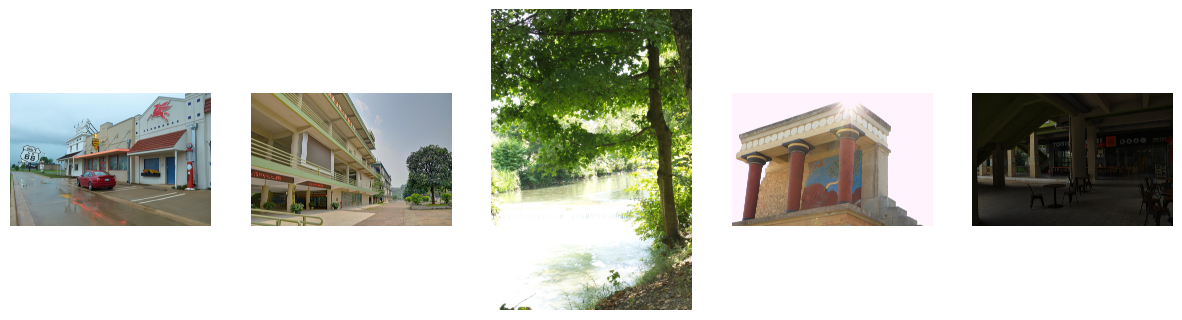

In [ ]:
# Function to display images
def plot_training_images(image_files, num_images=5):
    """Plots a specified number of training images."""
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_file in enumerate(image_files[:num_images]):
        image = plt.imread(img_file)
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

# # Plot the first 5 training images
# plot_training_images(train_images)

#     fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
#     for i, img_file in enumerate(image_files[:num_images]):
#         img = cv2.imread(img_file)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
#         axes[i].imshow(img)
#         axes[i].axis('off')
#     plt.show()

# Plot the first 5 training images
plot_training_images(image_files)

In [10]:
# Initialize trainer and load the train images as training data
trainer = Trainer()

trainer.load_data(train_images)

Dataset size:  200
Train size:  180
Validation size:  20


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [11]:
trainer.build_model(pretrain_weights="models/checkpoints/model200_dark_faces.pth")

Model built successfully


/content/CV_Assignment_LLIE/zero_dce/trainer.py:124: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(pretrain_weights))


In [12]:
trainer.compile(pretrain_weights="models/checkpoints/model200_dark_faces.pth")

Model built successfully


/content/CV_Assignment_LLIE/zero_dce/trainer.py:124: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(pretrain_weights))


In [26]:
# Original version of Zero-DCE
zeroDCE = trainer.model
zeroDCE.to(device)

DCENet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(64, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU(inplace=True)
)

In [ ]:
# Freeze the layer
zeroDCE.requires_grad_(False)

for param in zeroDCE.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False


## Add Denoising Autoencoder to enhance the Original DCE-Net

In [21]:
trainer.build_dae()

DAE built successfully


In [22]:
trainer.dae

DenoisingAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (3): Sigmoid()
  )
)

In [23]:
trainer.train_dae(trainer.model, n_epochs=20)

100%|██████████| 6/6 [00:41<00:00,  6.96s/it]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32, 32, 256, 256])) that is different to the input size (torch.Size([32, 32, 259, 259])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (259) must match the size of tensor b (256) at non-singleton dimension 3

In [24]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [27]:
# We will integrate the denoising layers after the 4th convolutional layer in the DCE-Net
# So we need to extract the features from Conv4 as our input images for the DAE model instead of using the original input images
def extract_conv4_features(dce_net, image_loader):
    dce_net.eval()
    features = []
    with torch.no_grad():
        for images in image_loader:
            images = images.to(device)
            x1 = dce_net.conv1(images)
            x2 = dce_net.conv2(x1)
            x3 = dce_net.conv3(x2)
            x4 = dce_net.conv4(x3)
            features.append(x4.cpu())
    return torch.cat(features)

# Add synthetic noise to the image
def add_noise(image, noise_factor=0.1):
  noisy_image = image + noise_factor * torch.randn_like(image)
  return torch.clip(noisy_image, 0, 1)

image_loader = DataLoader(trainer.train_loader.dataset, batch_size=32, shuffle=True)
conv4_features = extract_conv4_features(zeroDCE, image_loader)
noisy_features = add_noise(conv4_features)

In [31]:
def train_DAE(model, train_loader, val_loader, num_epochs=10, learning_rate=0.001, device=device, notebook=True):
    model.to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    if notebook:
      from tqdm.notebook import tqdm as tqdm_notebook
      tqdm = tqdm_notebook
    else:
      from tqdm import tqdm

    for epoch in range(num_epochs):
        train_loss = 0.0
        model.train()

        for noisy_image, clean_image in train_loader:
            noisy_image = noisy_image.to(device)
            clean_image = clean_image.to(device)

            outputs = model(noisy_image)
            loss = criterion(outputs, clean_image)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        model.eval()

        val_loss = 0.0

        with torch.no_grad():
            for noisy_image, clean_image in val_loader:
                noisy_image = noisy_image.cuda()
                clean_image = clean_image.cuda()

                denoised_image = model(noisy_image)

                loss = criterion(denoised_image, clean_image)

                val_loss += loss.item()

        train_loss = train_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        print(f"Epoch {epoch} - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

            # .save_model(save_path=f'dae_epoch_{epoch}.pth', save_dir='./models/checkpoints')

    return model

In [32]:
dataset = TensorDataset(noisy_features, conv4_features)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

dae_model = DenoisingAutoencoder()
dae_model = train_DAE(dae_model, train_loader, val_loader, num_epochs=10, learning_rate=0.001, device=device, notebook=True)

Epoch 0 - Train Loss: 1.2749, Validation Loss: 1.4254
Epoch 1 - Train Loss: 1.2316, Validation Loss: 1.3997
Epoch 2 - Train Loss: 1.1183, Validation Loss: 1.3233
Epoch 3 - Train Loss: 0.9374, Validation Loss: 1.1703
Epoch 4 - Train Loss: 0.8633, Validation Loss: 0.9239
Epoch 5 - Train Loss: 0.6268, Validation Loss: 0.7892
Epoch 6 - Train Loss: 0.5193, Validation Loss: 0.7739
Epoch 7 - Train Loss: 0.5259, Validation Loss: 0.7730
Epoch 8 - Train Loss: 0.7202, Validation Loss: 0.7730
Epoch 9 - Train Loss: 0.6958, Validation Loss: 0.7730


In [ ]:
# Integrate into DCE-Net
class EnhancedDCENet(nn.Module):
    def __init__(self, dce_net, dae):
        super(EnhancedDCENet, self).__init__()
        self.dce_net = dce_net
        self.dae = dae

    def forward(self, x):
        x1 = self.dce_net.relu(self.dce_net.conv1(x))
        x2 = self.dce_net.relu(self.dce_net.conv2(x1))
        x3 = self.dce_net.relu(self.dce_net.conv3(x2))
        x4 = self.dce_net.relu(self.dce_net.conv4(x3))

        # Apply DAE to denoise conv4 features
        x4_denoised = self.dae(x4)

        x5 = self.dce_net.relu(self.dce_net.conv5(torch.cat([x3, x4_denoised], dim=1)))
        x6 = self.dce_net.relu(self.dce_net.conv6(torch.cat([x2, x5], dim=1)))
        x7 = self.dce_net.conv7(torch.cat([x1, x6], dim=1))

        # Result tensor shape: (batch_size, 24, H, W)
        # Tanh activation function ensures the output curve parameter values range from -1 to 1
        x_r = torch.tanh(x7)

        # Split the result tensor into 8 residual maps (each with 3 RGB channels)
        r1, r2, r3, r4, r5, r6, r7, r8 = torch.split(x_r, split_size_or_sections=3, dim=1)

        # Enhancement process to compute the light-enhancement curve (LE-curve) using residual maps
        x = x + r1 * (torch.pow(x,2) - x)
        x = x + r2 * (torch.pow(x,2) - x)
        x = x + r3 * (torch.pow(x,2) - x)
        enhanced_image_1 = x + r4 * (torch.pow(x,2) - x)
        x = enhanced_image_1 + r5 * (torch.pow(enhanced_image_1,2) - enhanced_image_1)
        x = x + r6 * (torch.pow(x,2) - x)
        x = x + r7 * (torch.pow(x,2) - x)
        enhanced_image_final = x + r8 * (torch.pow(x,2) - x)

        r = torch.cat([r1, r2, r3, r4, r5, r6, r7, r8], dim=1)
        return enhanced_image_1, enhanced_image_final, r

In [ ]:
enhanced_dce_net = EnhancedDCENet(zeroDCE, dae_model)
trainer.model = enhanced_dce_net

In [ ]:
trainer.model

EnhancedDCENet(
  (dce_net): DCENet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv5): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv7): Conv2d(64, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU(inplace=True)
  )
  (dae): DenoisingAutoencoder(
    (encoder): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
    )
    (decoder): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (

In [ ]:
trainer.model.dce_net.requires_grad_(False)

DCENet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(64, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU(inplace=True)
)

In [ ]:
trainer.train(n_epochs=200, log_frequency=100)

Epoch 1/200: 


  0%|          | 0/23 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


AttributeError: 'EnhancedDCENet' object has no attribute 'dae'